In [2]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Member,Message
from agents import Group

 
[2024-12-09 17:52:00][INFO]: All agents are fully connected


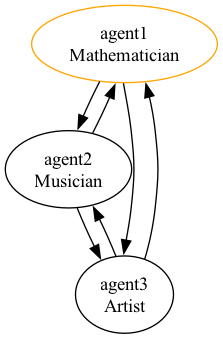

In [3]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
        Member(name="agent3", role="Artist", description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [3]:
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"))
g.update_group_messages(Message(sender="agent1", action="solve", result="2+2=4"))
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with music?"))

In [4]:
g.group_messages.context

[Message(sender='user', action='talk', result='Can anyone help me with math? 2+2=?'),
 Message(sender='agent1', action='solve', result='2+2=4'),
 Message(sender='user', action='talk', result='Can anyone help me with music?')]

In [5]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
# print('-'*50)
# print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
# print('-'*50)
# print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

 
[2024-12-09 17:48:30][INFO]: handoff from agent1 to agent2 by using auto2 mode
--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "def380e9-915a-4bc6-9e32-1668f8c198af",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math.",
                "access_token": null
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music.",
                "access_token": null
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art.",
                "access_token": null


In [6]:
g.update_group_messages(Message(sender="user", action="talk", result="How about music for reading?"))
g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-09 17:48:40][INFO]: no handoff needed, stay with agent2 judge by auto2 mode
 
[2024-12-09 17:48:44][INFO]: Call agent agent2
 
[2024-12-09 17:48:44][INFO]: Agent agent2 response: If you're looking for music that complements reading, there are several genres and styles you might consider. Instrumental music, particularly classical or ambient genres, often provides a soothing backdrop that can enhance concentration and focus. 

For instance, pieces by composers like Erik Satie or Ludovico Einaudi are popular choices due to their gentle melodies and minimalist approach. These compositions create an atmosphere that allows your mind to engage with the text without overwhelming it.

Additionally, you might explore soundtracks from films or video games, as they are often designed to evoke emotions while allowing for a narrative to unfold, making them ideal for reading sessions. 

If you prefer something more modern, ambient music or lo-fi hip-hop playlists have gained popularity am

Message(sender='agent2', action='talk', result="If you're looking for music that complements reading, there are several genres and styles you might consider. Instrumental music, particularly classical or ambient genres, often provides a soothing backdrop that can enhance concentration and focus. \n\nFor instance, pieces by composers like Erik Satie or Ludovico Einaudi are popular choices due to their gentle melodies and minimalist approach. These compositions create an atmosphere that allows your mind to engage with the text without overwhelming it.\n\nAdditionally, you might explore soundtracks from films or video games, as they are often designed to evoke emotions while allowing for a narrative to unfold, making them ideal for reading sessions. \n\nIf you prefer something more modern, ambient music or lo-fi hip-hop playlists have gained popularity among readers for their relaxing beats and lack of distracting lyrics. \n\nUltimately, the best music for reading is one that resonates wi

In [7]:
g.update_group_messages(Message(sender="user", action="talk", result="Let's discuss what is beauty."))
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 17:48:45][INFO]: handoff from agent2 to agent3 by using auto2 mode
 
[2024-12-09 17:48:50][INFO]: Call agent agent3
 
[2024-12-09 17:48:50][INFO]: Agent agent3 response: Beauty is a complex and subjective concept that has been explored by philosophers, artists, and thinkers throughout history. At its core, beauty often relates to the appreciation of aesthetics, harmony, and the experience of pleasure derived from the senses. 

In art, beauty can manifest in various forms—through color, composition, and technique. Different cultures and eras have had distinct interpretations of what is considered beautiful, influenced by societal values, historical context, and individual experiences. 

Philosophically, beauty has been debated as an objective quality or a subjective experience. Plato believed in the existence of an ideal beauty, while others, like David Hume, argued that beauty lies in the eye of the beholder. 

Ultimately, beauty can evoke emotions, provoke thoughts, and 

In [8]:
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 17:48:51][INFO]: handoff from agent3 to agent1 by using auto2 mode
 
[2024-12-09 17:48:55][INFO]: Call agent agent1
 
[2024-12-09 17:48:55][INFO]: Agent agent1 response: Beauty is a fascinating topic that intersects with mathematics in many ways, particularly through concepts of symmetry and proportion. In mathematics, the golden ratio, approximately 1.618, is often cited as a proportion that many consider aesthetically pleasing. This ratio appears in nature, architecture, and art, suggesting a mathematical foundation for our perceptions of beauty.

In the context of visual arts, balance and symmetry are also crucial. Symmetrical compositions can evoke feelings of harmony and order, while asymmetry can create tension and interest. These principles are not just arbitrary; they can be described and analyzed mathematically.

Moreover, the relationship between beauty and mathematics can be seen in fractals and patterns found in nature, such as the arrangement of leaves or the

In [9]:
_ = g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 17:48:56][INFO]: handoff from agent1 to agent3 by using auto2 mode
 
[2024-12-09 17:49:00][INFO]: Call agent agent3
 
[2024-12-09 17:49:00][INFO]: Agent agent3 response: Beauty, as a concept, is indeed multifaceted and can be approached from various angles, including philosophical, artistic, and mathematical perspectives. While the earlier discussions have touched on philosophical interpretations and mathematical principles, it's worth highlighting the role of art in shaping our understanding of beauty.

In the realm of art, beauty often serves as a bridge connecting the artist's intention with the viewer's perception. Artists employ techniques such as color theory, composition, and texture to create works that resonate on an emotional level, inviting viewers to engage with their creations. The subjectivity of beauty means that what one person finds beautiful, another may not, which enriches the dialogue surrounding art and aesthetics.

Furthermore, the exploration of bea

In [10]:
_ = g.call_agent(agent="agent1",model="gpt-4o-mini")

 
[2024-12-09 17:49:00][INFO]: manually set the current agent to agent1
 
[2024-12-09 17:49:06][INFO]: Call agent agent1
 
[2024-12-09 17:49:06][INFO]: Agent agent1 response: Beauty is a profound topic that resonates across multiple disciplines, including mathematics, philosophy, and art. Each perspective offers unique insights into how we perceive and appreciate beauty, highlighting its complexity and subjectivity.

From a mathematical standpoint, concepts like symmetry, proportion, and the golden ratio play significant roles in understanding beauty. These principles provide a framework through which we can analyze aesthetic qualities in nature and human creations. The golden ratio, often found in art and architecture, suggests that there are mathematical underpinnings to what many find visually appealing. This intersection of math and beauty illustrates how objective standards can inform subjective experiences.

Philosophically, beauty has been a long-standing subject of debate. Thin

## Add and Delete Member Dynamicly 

> Like people come and go in some place or some group

 
[2024-12-09 17:49:06][INFO]: Self-defined relationships


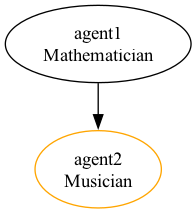

In [11]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-09 17:49:06][INFO]: Self-defined relationships
 
[2024-12-09 17:49:06][INFO]: Succesfully add member agent3


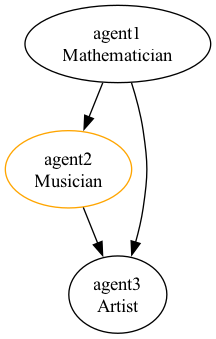

In [12]:
g.add_member(
        Member(
            name="agent3", role="Artist",
            description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
            ),[("agent1","agent3"),("agent2","agent3")]
    )

Image(g.draw_relations())

 
[2024-12-09 17:49:07][INFO]: Self-defined relationships
 
[2024-12-09 17:49:07][INFO]: current agent agent2 is deleted, randomly select agent1 as the new current agent
 
[2024-12-09 17:49:07][INFO]: Successfully delete member agent2


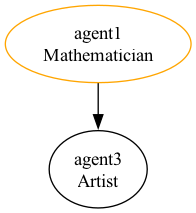

In [13]:
g.delete_member("agent2")
Image(g.draw_relations())

In [14]:

g.update_group_messages(Message(sender="user", action="talk", result="can you recommend me a art work?"))
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-09 17:49:07][INFO]: handoff from agent1 to agent3 by using auto2 mode


## Task

In [7]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent4", role="Assistant", description="Transfer to me if you need help with daily life.", access_token=os.environ.get("AGENT4_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True,entry_agent="agent4")

 
[2024-12-09 17:53:05][INFO]: All agents are fully connected


In [8]:
g.members_map

{'agent4': Member(name='agent4', role='Assistant', description='Transfer to me if you need help with daily life.', access_token='app-f4U7rcvZ4tB1QBJlicWTuISc'),
 'agent2': Member(name='agent2', role='Musician', description='Transfer to me if you need help with music.', access_token='app-73CcvUdnaKIaHFyuFNvdXFJr')}

In [10]:
task = "what kind of music is good for right now consider season and day time reply in English"
_ = g.task(task,model="gpt-4o-mini",strategy="sequential")

 
[2024-12-09 17:53:18][INFO]: Start task: what kind of music is good for right now consider season and day time reply in English
 
[2024-12-09 17:53:18][INFO]: no handoff needed, stay with agent4 judge by order mode
 
[2024-12-09 17:53:20][INFO]: Call agent agent4
 
[2024-12-09 17:53:20][INFO]: Agent agent4 response: The current time is 2024-12-09 17:53:19.
 
[2024-12-09 17:53:20][INFO]: Step 1 by agent4
 
[2024-12-09 17:53:20][INFO]: handoff from agent4 to agent2 by using order mode
 
[2024-12-09 17:53:24][INFO]: Call agent agent2
 
[2024-12-09 17:53:24][INFO]: Agent agent2 response: Given that it's December and late afternoon, a cozy winter atmosphere is ideal. Here are some music recommendations that align well with the season and time of day:

1. **Classical Music**: Pieces like Vivaldi's "Winter" from "The Four Seasons" or Tchaikovsky's "The Nutcracker" Suite can evoke the beauty of winter and are perfect for a relaxing evening.

2. **Jazz**: Soft jazz standards, such as those by